# Analyze Results of Random Walk
## 2019 - 2023 for September 11, 2001 Attacks

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# pd.set_option('display.float_format', '{:e}'.format)

In [19]:
test_df = pd.read_csv("../output/random_walks/not_uniform_prob/2019-01_sept11_~uniform.csv")
test_df.rename(columns={"Unnamed: 0": "index"}, inplace=True)

In [20]:
test_df.head()

,index,page,eig_cent
0,0,Permian,0.000004
1,1,Thunder_and_Lightning_(album),0.000004
2,2,Daisy_chain_(electrical_engineering),0.000004
3,3,Corregidor,0.000004
4,4,Baleen,0.000004


In [21]:
test_df.tail()

,index,page,eig_cent
242908,242908,RSS,0.000004
242909,242909,The_Big_Snooze,0.000004
242910,242910,Hudson_Taylor,0.000004
242911,242911,Exclusive_economic_zone_of_Japan,0.000004
242912,242912,Mustelidae,0.000004


In [22]:
test_df["eig_cent_scaled"] = test_df["eig_cent"] * 1000000
test_df.head()

,index,page,eig_cent,eig_cent_scaled
0,0,Permian,0.000004,4.1167
1,1,Thunder_and_Lightning_(album),0.000004,4.1167
2,2,Daisy_chain_(electrical_engineering),0.000004,4.1167
3,3,Corregidor,0.000004,4.1167
4,4,Baleen,0.000004,4.1167


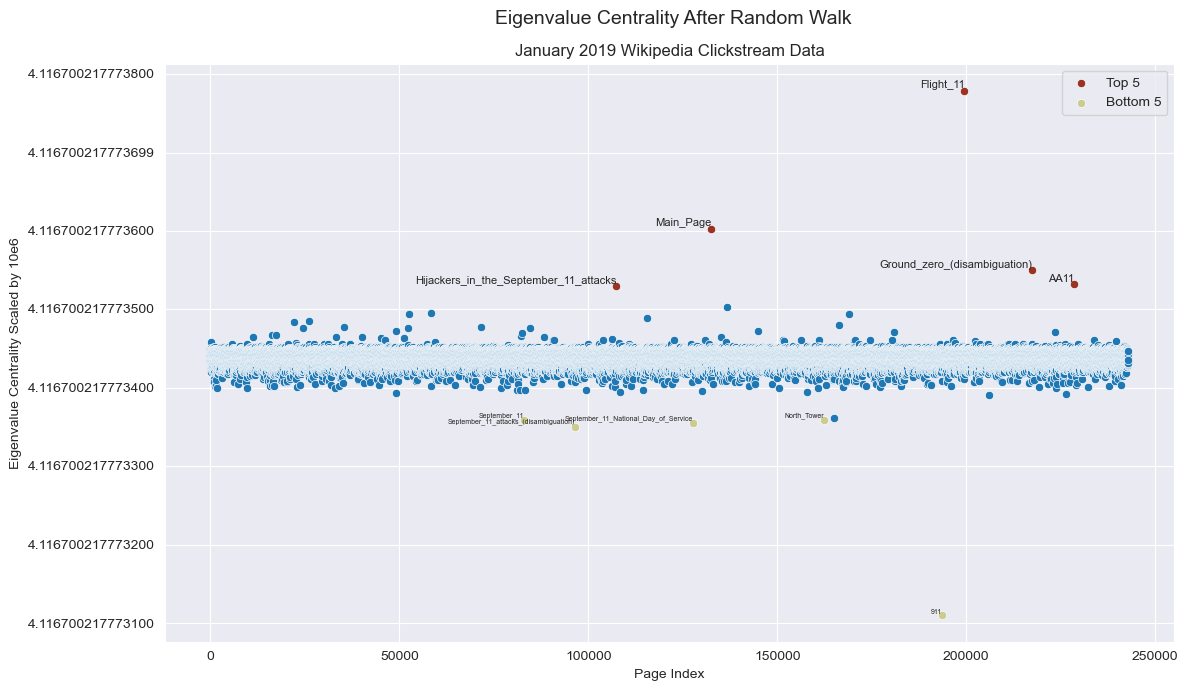

In [51]:
plt.figure(figsize=(12, 7))

sns.scatterplot(test_df, x="index", y="eig_cent_scaled")


# Get top
top_5 = test_df.nlargest(5, "eig_cent_scaled")
bottom_5 = test_df.nsmallest(5, "eig_cent_scaled")

# Add labels
for idx, row in top_5.iterrows():
    plt.text(row["index"], row["eig_cent_scaled"], f"{row['page']}", ha="right", va="bottom", fontsize=8)

for idx, row in bottom_5.iterrows():
    plt.text(row["index"], row["eig_cent_scaled"], f"{row['page']}", ha="right", va="bottom", fontsize=5)
    
# Add colors
top_mask = test_df['index'].isin(top_5['index'])
bottom_mask = test_df['index'].isin(bottom_5['index'])
sns.scatterplot(x="index", y="eig_cent_scaled", data=test_df[top_mask], color='#9a3324', label='Top 5')
sns.scatterplot(x="index", y="eig_cent_scaled", data=test_df[bottom_mask], color='#cbcc8d', label='Bottom 5')

plt.grid(True, which="both")
decimal_places = 15  # Adjust as needed
plt.gca().yaxis.set_major_formatter(FormatStrFormatter(f"%.{decimal_places}f"))
plt.legend()
plt.ylabel("Eigenvalue Centrality Scaled by 10e6")
plt.xlabel("Page Index")
plt.suptitle("Eigenvalue Centrality After Random Walk", x=0.565, fontsize=14)
plt.title("January 2019 Wikipedia Clickstream Data")
plt.tight_layout()
plt.savefig("../output/plots/test.png", format="png")
plt.show()

In [24]:
test_df.sort_values(by="eig_cent", ascending=False)

,index,page,eig_cent,eig_cent_scaled
199507,199507,Flight_11,0.000004,4.1167
132525,132525,Main_Page,0.000004,4.1167
217500,217500,Ground_zero_(disambiguation),0.000004,4.1167
228555,228555,AA11,0.000004,4.1167
107368,107368,Hijackers_in_the_September_11_attacks,0.000004,4.1167
...,...,...,...,...
162382,162382,North_Tower,0.000004,4.1167
82915,82915,September_11,0.000004,4.1167
127689,127689,September_11_National_Day_of_Service,0.000004,4.1167
96519,96519,September_11_attacks_(disambiguation),0.000004,4.1167


In [25]:
test_df["eig_cent"].min()

4.116700217773111e-06

In [26]:
test_df["eig_cent"].max()

4.116700217773778e-06